In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL

import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
!unzip /content/drive/MyDrive/DL_CNN.zip

In [3]:
data_dir = ("/content/DL_CNN")
print(data_dir)

/content/DL_CNN


In [4]:
data_dir = pathlib.Path("/content/DL_CNN")
print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

/content/DL_CNN


[PosixPath('/content/DL_CNN/Dog/6641.jpg'),
 PosixPath('/content/DL_CNN/Dog/12379.jpg'),
 PosixPath('/content/DL_CNN/Dog/4854.jpg'),
 PosixPath('/content/DL_CNN/Dog/10631.jpg'),
 PosixPath('/content/DL_CNN/Dog/8443.jpg')]

In [5]:
dogs = list(data_dir.glob('Dog/*'))
dogs[:5]

[PosixPath('/content/DL_CNN/Dog/6641.jpg'),
 PosixPath('/content/DL_CNN/Dog/12379.jpg'),
 PosixPath('/content/DL_CNN/Dog/4854.jpg'),
 PosixPath('/content/DL_CNN/Dog/10631.jpg'),
 PosixPath('/content/DL_CNN/Dog/8443.jpg')]

In [6]:
cats = list(data_dir.glob('Cat/*'))
cats[:5]

[PosixPath('/content/DL_CNN/Cat/230.jpg'),
 PosixPath('/content/DL_CNN/Cat/6641.jpg'),
 PosixPath('/content/DL_CNN/Cat/11654.jpg'),
 PosixPath('/content/DL_CNN/Cat/7379.jpg'),
 PosixPath('/content/DL_CNN/Cat/3041.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

13638


In [8]:
X, Y = [], []

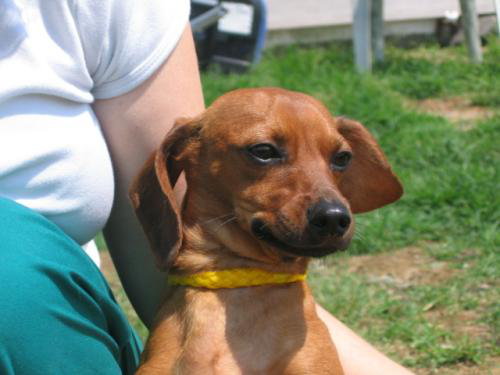

In [9]:
PIL.Image.open(str(dogs[1]))

In [10]:
pet_images_dict = {
    'cats': list(data_dir.glob('Cat/*')),
    'dogs': list(data_dir.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [11]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            #print("Invalid Image")
            continue

cats
dogs


In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape) 
print(Y_test.shape)

9855 9855
3286 3286
(9855, 150, 150, 3)
(9855,)
(3286, 150, 150, 3)
(3286,)


In [14]:
len(Y_test)

3286

In [15]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [17]:
mkdir CNN-Model

In [18]:
backup_dir = "/content/CNN-Model"

In [19]:
import tensorflow as tf
call_backs = [tf.keras.callbacks.TensorBoard(log_dir='./logs'),
              tf.keras.callbacks.BackupAndRestore(backup_dir),
              tf.keras.callbacks.ModelCheckpoint("/content/CNN-Model",monitor="val_loss",save_best_only=True,save_weights_only=True,mode="auto",save_freq="epoch",
    
)]

In [21]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy())
history = model.fit(X_train, Y_train, epochs=20,validation_data=(X_test, Y_test),callbacks = call_backs)

Epoch 3/20
308/308 [==============================] - 231s 749ms/step - loss: 0.2841 - binary_accuracy: 0.9183 - val_loss: 0.2590 - val_binary_accuracy: 0.9200
Epoch 4/20
308/308 [==============================] - 230s 747ms/step - loss: 0.2676 - binary_accuracy: 0.9213 - val_loss: 0.2691 - val_binary_accuracy: 0.9184
Epoch 5/20
308/308 [==============================] - 229s 745ms/step - loss: 0.2594 - binary_accuracy: 0.9208 - val_loss: 0.2529 - val_binary_accuracy: 0.9172
Epoch 6/20
308/308 [==============================] - 249s 808ms/step - loss: 0.2473 - binary_accuracy: 0.9230 - val_loss: 0.2558 - val_binary_accuracy: 0.9206
Epoch 7/20
308/308 [==============================] - 228s 739ms/step - loss: 0.2337 - binary_accuracy: 0.9253 - val_loss: 0.2597 - val_binary_accuracy: 0.9191
Epoch 8/20
308/308 [==============================] - 228s 738ms/step - loss: 0.2171 - binary_accuracy: 0.9286 - val_loss: 0.2915 - val_binary_accuracy: 0.9206
Epoch 9/20
308/308 [====================

In [22]:
model.save('cnn_catvsdog.h5')

In [23]:
test_loss, test_acc = model.evaluate(X_test,  Y_test)

103/103 [==============================] - 21s 206ms/step - loss: 0.6281 - binary_accuracy: 0.9099


In [24]:
test_acc*100

90.9920871257782

In [25]:
x = model.predict(X_test)

In [ ]:
x

In [ ]:
model.predict(X_test[:2])

In [ ]:
print(x[10])

In [ ]:
print(x.shape)

In [ ]:
x[0]

In [31]:
m = ("/content/cnn_catvsdog.h5")
m

'/content/cnn_catvsdog.h5'

In [32]:
%load_ext tensorboard

In [33]:

import tensorflow as tf
import datetime

In [ ]:
%tensorboard --logdir logs/fit

In [35]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/fit (started 0:00:01 ago; pid 1533)


In [ ]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)

In [37]:
!tensorboard dev upload \
  --logdir logs \
  --name "CATVSDOG_CNN" \
  --description "TB" \
  --one_shot

2022-09-02 13:01:06.494341: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%

In [38]:
from PIL import Image
img = Image.fromarray(X_test[10],"RGB")
img.save("test_img.png")
img.show()

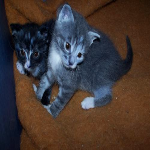

In [39]:
PIL.Image.open(str("test_img.png"))